In [1]:
import numpy as np
import cv2
import sys
import os
sys.path.insert(0, os.path.abspath('..'))

import salientregions as sr
import scipy.io as sio

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [8]:
SE_size_factor = 0.02
area_factor = 0.03
lam_factor = 5
num_levels = 20
thresh = 0.6
lam = 40
connectivity = 4

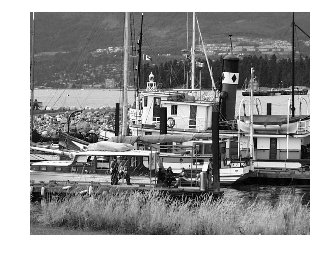

In [4]:
#Load the image
path_to_image = '../tests/images/Gray/Gray_scale.png'
img = cv2.imread(path_to_image)
sr.show_image(img)

In [11]:
#our detection object
#det = sr.SalientDetector(binarizer=binarizer, SE_size_factor=SE_size_factor, lam_factor=lam_factor, connectivity=connectivity)
det = sr.MSSRDetector(0, 255, step=int(255./num_levels), perc=thresh, SE_size_factor=SE_size_factor, lam_factor=lam_factor, connectivity=connectivity)

In [12]:
area = img.shape[0] * img.shape[1]
SE2, lam2 = det.get_SE(area)
print area
print lam2, SE2.shape
print lam_factor*np.floor(SE_size_factor*np.sqrt(area/np.pi))

578000
40 (15, 15)
40.0


40 (15, 15)


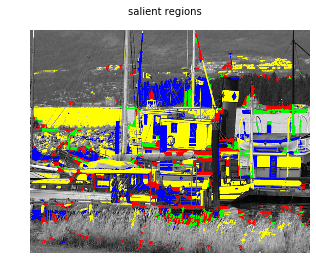

In [13]:
regions = det.detect(img,
                    find_holes=True,
                    find_islands=True,
                    find_indentations=True,
                    find_protrusions=True, 
                    visualize=False)
#assert det.lam == lam
print det.lam, det.SE.shape#, lam
sr.visualize_elements(img, regions=regions);

{'indentations': 148, 'islands': 200, 'holes': 120, 'protrusions': 175}


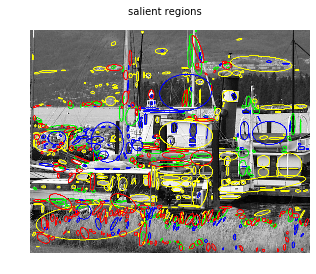

In [9]:
num_regions, features_standard, features_poly = sr.binary_mask2ellipse_features(regions, 
                                                                                connectivity=connectivity)
print(num_regions)
sr.visualize_elements_ellipses(img, features_standard);

{'indentations': 295, 'islands': 292, 'holes': 236, 'protrusions': 300}


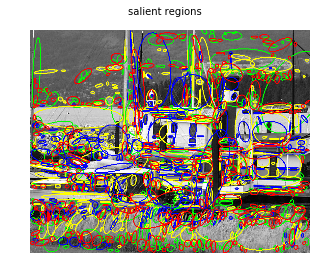

In [14]:
holes_true, islands_true, indents_true,  prots_true = \
    sr.read_matfile('../tests/images/Gray/Gray_scale_mssraregions.mat', visualize=False)
regions_dmsra = {"holes": holes_true, "islands": islands_true, 
                "indentations": indents_true, "protrusions":prots_true}
#sr.visualize_elements(img, regions_dmsra);
num_regions_dmsra, features_standard_dmsra, features_poly_dmsra = sr.binary_mask2ellipse_features(regions_dmsra, 
                                                                                connectivity=connectivity)
print(num_regions_dmsra)
sr.visualize_elements_ellipses(img, features_standard_dmsra);

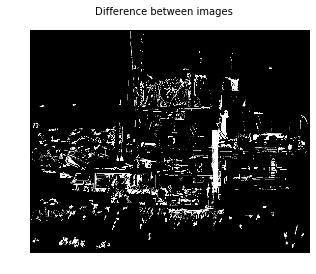

False


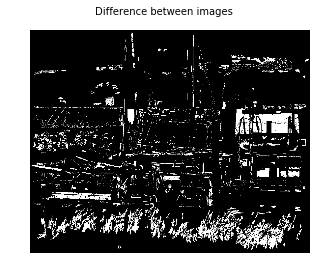

False


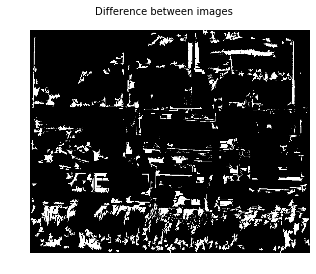

False


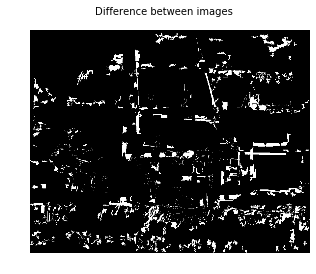

False


In [15]:
print sr.image_diff(regions['holes'], holes_true)
print sr.image_diff(regions['islands'], islands_true)
print sr.image_diff(regions['indentations'], indents_true)
print sr.image_diff(regions['protrusions'], prots_true)

In [ ]:
sr.show_image(regions['indentations'], "our indentiations")
sr.show_image(indents_true, "matlab indentations")
sr.show_image(regions['protrusions'], "our protrusions")
sr.show_image(prots_true, "matlab protrusions")
#print sr.image_diff(regions['indentations'], prots_true)
#print sr.image_diff(regions['protrusions'], indents_true)